1-1. 가격 예측

In [2]:
import pandas as pd
df1_1 = pd.read_csv("Medicalpremium.csv")
df1_1.info()
df1_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
y = df1_1.PremiumPrice
X = df1_1.drop( "PremiumPrice", axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( )
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9782179771989147

In [10]:
import numpy as np
pred = rf.predict(X_test)
np.sqrt( np.mean(    (pred-y_test)**2 ) )

3613.3074051401168

In [16]:
pd.DataFrame( {'nm':rf.feature_names_in_, 'imp':rf.feature_importances_})

nm       imp
0                      Age  0.661815
1                 Diabetes  0.004277
2    BloodPressureProblems  0.004861
3           AnyTransplants  0.111397
4       AnyChronicDiseases  0.040204
5                   Height  0.029778
6                   Weight  0.089708
7           KnownAllergies  0.002363
8  HistoryOfCancerInFamily  0.020295
9   NumberOfMajorSurgeries  0.035302

1-2. 신용카드 승인 분류

In [ ]:
#별도 노트

1-3. 은행 마케팅

In [17]:
!unzip bank-full.csv.zip

import pandas as pd
bank_df = pd.read_csv('bank-full.csv')

Archive:  bank-full.csv.zip
  inflating: bank-full.csv           


In [18]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
print(bank_df.isnull().any(axis=0))

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


In [20]:
bank_df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [21]:
bank_df.job.value_counts(ascending=False,normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [22]:
bank_df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='age'>

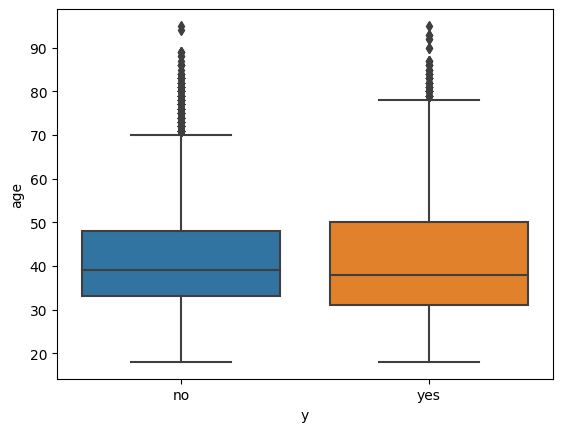

In [23]:
import seaborn as sns
sns.boxplot(x=bank_df.y, y=bank_df.age)

In [25]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#bank_df.dropna( subset=['job', 'education'])

In [ ]:
#bank_df.fillna({'contact':'unknown'})

In [29]:
bank_df[ bank_df.age >100 ]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

In [31]:
bank_df.replace( 'yes', 1, inplace=True)
bank_df.replace('no', 0, inplace=True)

In [32]:
job_enc = pd.get_dummies( bank_df['job'])

#concat to original data

In [33]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
for train_id, test_id in kf.split(bank_df):
  print(train_id)
  print( bank_df.iloc[ train_id, :].shape)
  print(test_id)
  print( bank_df.iloc[ test_id, :].shape)



[    0     1     2 ... 45208 45209 45210]
(40689, 17)
[   33    60    64 ... 45173 45186 45203]
(4522, 17)
[    0     1     3 ... 45208 45209 45210]
(40690, 17)
[    2     6    24 ... 45184 45189 45196]
(4521, 17)
[    0     1     2 ... 45207 45208 45209]
(40690, 17)
[   16    38    45 ... 45204 45206 45210]
(4521, 17)
[    0     1     2 ... 45207 45208 45210]
(40690, 17)
[    4    19    31 ... 45194 45199 45209]
(4521, 17)
[    0     1     2 ... 45208 45209 45210]
(40690, 17)
[   17    23    25 ... 45106 45128 45148]
(4521, 17)
[    0     1     2 ... 45208 45209 45210]
(40690, 17)
[   10    13    21 ... 45163 45175 45185]
(4521, 17)
[    0     2     4 ... 45208 45209 45210]
(40690, 17)
[    1     3     5 ... 45178 45191 45198]
(4521, 17)
[    0     1     2 ... 45207 45209 45210]
(40690, 17)
[   32    62    82 ... 45180 45183 45208]
(4521, 17)
[    0     1     2 ... 45208 45209 45210]
(40690, 17)
[    9    35    39 ... 45179 45192 45200]
(4521, 17)
[    1     2     3 ... 45208 45209 45

In [45]:
from sklearn.preprocessing import LabelEncoder

bank_df.info()
cat_var = [ i for i in bank_df.columns if bank_df[i].dtype == "object"]
num_var = [ i for i in bank_df.columns if bank_df[i].dtype != "object"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [53]:
from sklearn.model_selection import train_test_split
y = bank_df.y
X = bank_df.loc[ :, num_var ].drop("y", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)


In [58]:
from sklearn.model_selection import GridSearchCV
params = { "max_depth":[2,4,6,8], "min_samples_leaf":[10,20,30]}
clf = GridSearchCV(DecisionTreeClassifier(), params, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_score_
clf.best_params_
clf.best_estimator_.feature_importances_


array([0.0802105 , 0.        , 0.02888107, 0.11896692, 0.00836353,
       0.02561879, 0.57490039, 0.01422169, 0.1333699 , 0.01546721])

In [59]:
for i in cat_var:
  print( bank_df[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [73]:
#job을 binary
bank_df.loc[ (bank_df['job']=='management' ) |
             (bank_df['job']=='technician' ) |
             (bank_df['job']=='blue-collar' ) |
             (bank_df['job']=='admin.' ) |
             (bank_df['job']=='services' ) |
             (bank_df['job']=='self-employed' ) |
             (bank_df['job']=='entrepreneur' ) |
             (bank_df['job']=='housemaid' ), 'job2'] = 'worker'

In [72]:
#월을 분기로
bank_df.loc[ (bank_df['month']=='jan' ) |
             (bank_df['month']=='feb' ) |
             (bank_df['month']=='mar' ), 'month2'] = '1Q'

bank_df.loc[ (bank_df['month']=='apr' ) |
             (bank_df['month']=='may' ) |
             (bank_df['month']=='jun' ), 'month2'] = '2Q'

bank_df.loc[ (bank_df['month']=='jul' ) |
             (bank_df['month']=='aug' ) |
             (bank_df['month']=='aug' ), 'month2'] = '3Q'

bank_df.loc[ (bank_df['month']=='oct' ) |
             (bank_df['month']=='nov' ) |
             (bank_df['month']=='dec' ), 'month2'] = '4Q'

In [ ]:
#education
pd.factorize( bank_df["education"])
pd.get_dummies( bank_df["education"])

In [ ]:
#contact
pd.factorize( bank_df["contact"])
pd.get_dummies(bank_df["contact"])

In [ ]:
#poutcome
pd.factorize( bank_df["poutcome"])
pd.get_dummies(bank_df["poutcome"])

In [ ]:
#marital
pd.factorize( bank_df["marital"])
pd.get_dummies(bank_df["marital"])

In [79]:
cat_var

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [83]:
tmp_df = pd.DataFrame()
for i in cat_var:
  if i not in ['job', 'month']:
    tmp_enc = pd.get_dummies(bank_df[i])
    tmp_df = pd.concat( [ tmp_df, tmp_enc ], axis=1)

In [88]:
bank_df_new = pd.concat( [bank_df, tmp_df], axis=1)
bank_df_new.drop( ["job", "month"], axis=1, inplace=True)

In [89]:
from sklearn.model_selection import train_test_split
y = bank_df_new.y
X = bank_df_new.loc[ :, num_var ].drop("y", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)


In [91]:
from sklearn.model_selection import GridSearchCV
params = { "max_depth":[2,4,6,8], "min_samples_leaf":[10,20,30]}
clf = GridSearchCV(DecisionTreeClassifier(), params, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_score_
clf.best_params_
clf.best_estimator_.feature_importances_


array([6.86803253e-02, 1.39645625e-03, 4.87688709e-03, 1.38998049e-01,
       0.00000000e+00, 6.49235486e-03, 6.13543136e-01, 0.00000000e+00,
       1.65958202e-01, 5.45894475e-05])

1-4.
https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network/overview

In [ ]:
import pandas as pd
df1_4 = pd.read_csv("train.csv")

In [ ]:
df1_4.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [ ]:
df1_4["follower_cnt_diff"] = df1_4.A_follower_count - df1_4.B_follower_count
df1_4["listed_cnt_diff"] = df1_4.A_listed_count - df1_4.B_listed_count
df1_4["mentions_received_diff"] = df1_4.A_mentions_received - df1_4.B_mentions_received
df1_4["mentions_sent_diff"] = df1_4.A_mentions_sent - df1_4.B_mentions_sent
df1_4["retweets_received_diff"] = df1_4.A_retweets_received - df1_4.B_retweets_received
df1_4["retweets_sent_diff"] = df1_4.A_retweets_sent - df1_4.B_retweets_sent
df1_4["net_feature1"] = df1_4.A_network_feature_1 - df1_4.B_network_feature_1
df1_4["net_feature2"] = df1_4.A_network_feature_2 - df1_4.B_network_feature_2
df1_4["net_feature3"] = df1_4.A_network_feature_3 - df1_4.B_network_feature_3

In [ ]:
df_new = df1_4[   ["Choice", "follower_cnt_diff", "listed_cnt_diff", "mentions_received_diff", "mentions_sent_diff", "retweets_received_diff",
                   "retweets_sent_diff", "net_feature1", "net_feature2", "net_feature3"]]


In [ ]:
df_new.head()

Choice  follower_cnt_diff  listed_cnt_diff  mentions_received_diff  \
0       0             -34235            -1686              -14.846518   
1       0             -17671            -1382               49.961485   
2       0               3688             -105               24.768949   
3       0             -19542             -276             -565.184032   
4       1              38035             2460              127.252413   

   mentions_sent_diff  retweets_received_diff  retweets_sent_diff  \
0           -8.103828               -3.883525           -0.231920   
1            2.481652               16.854685            0.546816   
2            4.758317                9.201969            0.490702   
3          -26.220532             -390.016375           -7.067053   
4           21.117111               33.417223            2.213765   

   net_feature1  net_feature2  net_feature3  
0           -64     90.969697   9438.106061  
1           206   -113.587704  -1601.149290  
2            92     58.594502   5722.563574  
3         -1756    -21.469296  -1299.678967  
4           466     78.904293    840.220036

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new2 = pd.DataFrame( scaler.fit_transform(df_new.drop("Choice", axis=1)), columns=df_new.drop("Choice", axis=1).columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_new2, df_new.Choice, test_size=0.2 )


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit( X_train, y_train )
rf.score( X_train, y_train)

from sklearn.metrics import classification_report
pred = rf.predict( X_test)
print( classification_report( y_test, pred))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       547
           1       0.75      0.77      0.76       553

    accuracy                           0.76      1100
   macro avg       0.76      0.76      0.76      1100
weighted avg       0.76      0.76      0.76      1100



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit( df_new2, df_new.Choice )
rf.score(  df_new2, df_new.Choice)

0.9916363636363636

In [ ]:
import pandas as pd
df1_4_test = pd.read_csv("test.csv")

df1_4_test["follower_cnt_diff"] = df1_4_test.A_follower_count - df1_4_test.B_follower_count
df1_4_test["listed_cnt_diff"] = df1_4_test.A_listed_count - df1_4_test.B_listed_count
df1_4_test["mentions_received_diff"] = df1_4_test.A_mentions_received - df1_4_test.B_mentions_received
df1_4_test["mentions_sent_diff"] = df1_4_test.A_mentions_sent - df1_4_test.B_mentions_sent
df1_4_test["retweets_received_diff"] = df1_4_test.A_retweets_received - df1_4_test.B_retweets_received
df1_4_test["retweets_sent_diff"] = df1_4_test.A_retweets_sent - df1_4_test.B_retweets_sent
df1_4_test["net_feature1"] = df1_4_test.A_network_feature_1 - df1_4_test.B_network_feature_1
df1_4_test["net_feature2"] = df1_4_test.A_network_feature_2 - df1_4_test.B_network_feature_2
df1_4_test["net_feature3"] = df1_4_test.A_network_feature_3 - df1_4_test.B_network_feature_3

In [ ]:
df_new_test = df1_4_test[   [ "follower_cnt_diff", "listed_cnt_diff", "mentions_received_diff", "mentions_sent_diff", "retweets_received_diff",
                   "retweets_sent_diff", "net_feature1", "net_feature2", "net_feature3"]]

In [ ]:
df_new_test2 = pd.DataFrame( scaler.transform(df_new_test), columns=df_new_test.columns)
rf.predict(df_new_test2)